In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
# Set figure settings.
style.use('fivethirtyeight')

In [2]:
orders = pd.read_csv('data/Orders.csv',index_col='Row.ID',
                     parse_dates=['Order.Date','Ship.Date'])

returns = pd.read_csv('data/Returns.csv')



### problem 1

In [3]:
def clean_numeric_col(df,col):
    df[col] = pd.to_numeric(df[col].str.replace('$', '').str.replace(',',''))
    return df[col]
orders['Profit'] = clean_numeric_col(orders,'Profit')
orders['Sales'] = clean_numeric_col(orders,'Sales')




<ipython-input-3-63e9c7538f20>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = pd.to_numeric(df[col].str.replace('$', '').str.replace(',',''))


### problem 2

In [4]:
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [5]:
orders.loc[1,'Order.Date']

Timestamp('2015-10-02 00:00:00')

In [6]:
orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [7]:
orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [8]:
orders.Region.unique()

array(['Central US', 'Oceania', 'Western Europe', 'Western Africa',
       'Western US', 'Southern Asia', 'Western Asia', 'South America',
       'Eastern Asia', 'Southern Europe', 'Eastern Africa',
       'Eastern Europe', 'Northern Europe', 'Central America',
       'Eastern US', 'Caribbean', 'Central Africa', 'Southeastern Asia',
       'Southern US', 'North Africa', 'Southern Africa', 'Canada',
       'Central Asia'], dtype=object)

In [9]:
orders['order_year'] = orders['Order.Date'].dt.year
orders['order_month'] = orders['Order.Date'].dt.month

In [10]:
orders['order_year'].unique()

array([2014, 2012, 2013, 2015])

In [11]:
orders.groupby('order_month').agg({'Quantity':'sum'}).reset_index()

,order_month,Quantity
0,1,8872
1,2,7429
2,3,10390
3,4,10466
4,5,13196
5,6,18009
6,7,11046
7,8,17596
8,9,20479
9,10,16303


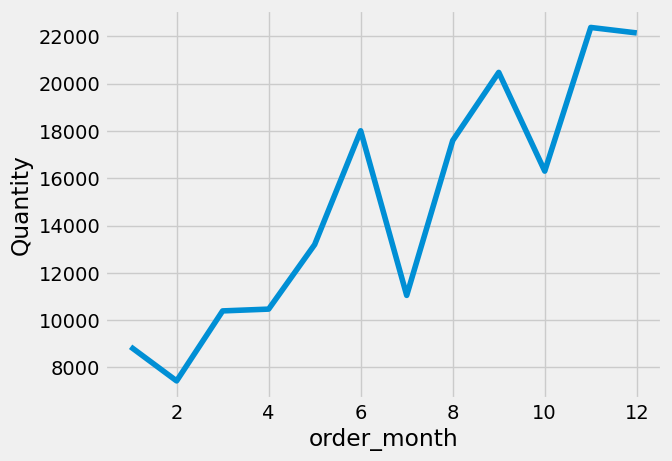

In [12]:
graph_df = orders.groupby('order_month').agg({'Quantity':'sum'}).reset_index()
g = sns.lineplot(data = graph_df, x = 'order_month',y='Quantity')
plt.show()

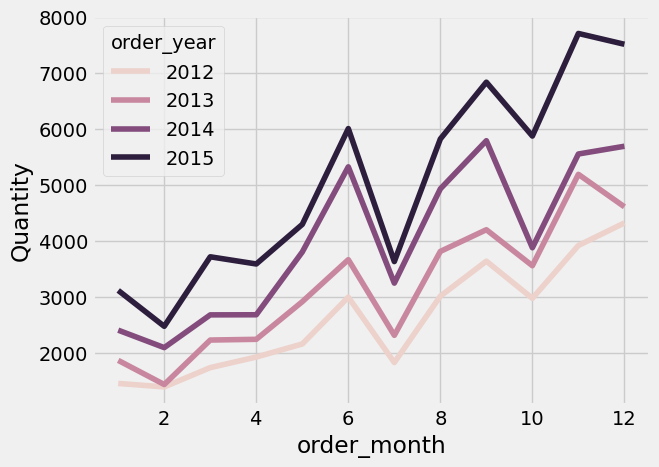

In [13]:
graph_df = orders.groupby(['order_month','order_year']).agg({'Quantity':'sum'}).reset_index()
g = sns.lineplot(data = graph_df, x = 'order_month',y='Quantity',
                hue='order_year')
plt.show()

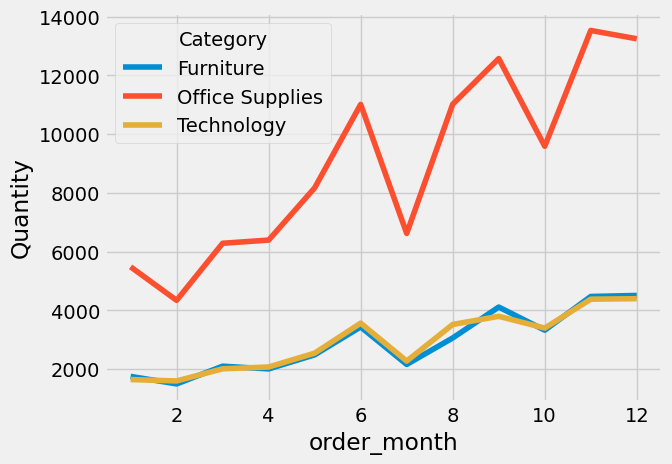

In [14]:
# graph_df = 
graph_df = orders.groupby(['order_month','Category']).agg({'Quantity':'sum'}).reset_index()
g = sns.lineplot(data = graph_df, x = 'order_month',y='Quantity',
                hue='Category')
plt.show()

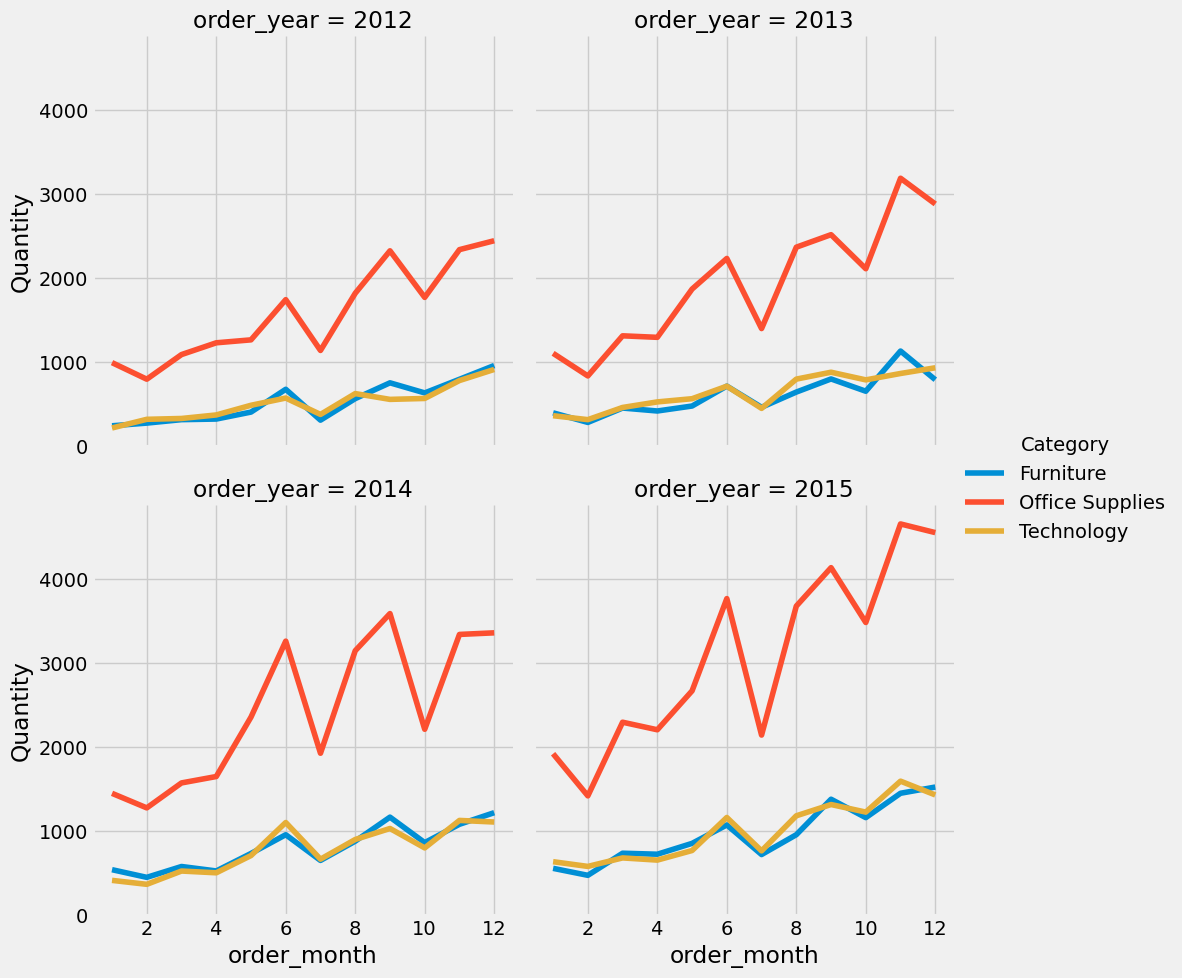

In [15]:
graph_df = orders.groupby(['order_month','order_year','Category']).agg({'Quantity':'sum'}).reset_index()
g = sns.relplot(data = graph_df, x = 'order_month',y='Quantity',
                hue='Category',col='order_year',kind='line',col_wrap=2)
plt.show()

In [16]:
orders.shape[0]-returns.shape[0]

50211

In [17]:
returns.shape

(1079, 3)

In [18]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [19]:
OR_merge = orders.merge(returns, 
                        how='left', left_on='Order.ID', 
                        right_on='Order ID')

OR_merge.loc[OR_merge['Returned'].isna(),'return_flag'] = 0
OR_merge.loc[~OR_merge['Returned'].isna(),'return_flag'] = 1

In [20]:
OR_merge.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region_x', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority', 'order_year', 'order_month',
       'Returned', 'Order ID', 'Region_y', 'return_flag'],
      dtype='object')

In [21]:
OR_merge['process_time'] = OR_merge['Ship.Date'] - OR_merge['Order.Date']
OR_merge.groupby(['return_flag']).agg({'process_time':'mean'})


,process_time
return_flag,
0.0,3 days 23:12:20.542082738
1.0,4 days 00:34:22.702702702


In [22]:
OR_merge.groupby(['return_flag']).agg({'process_time':'mean'})

,process_time
return_flag,
0.0,3 days 23:12:20.542082738
1.0,4 days 00:34:22.702702702


In [23]:
product_count = OR_merge.groupby(['Product.ID']).agg({'return_flag':'sum'}).reset_index()
product_count.columns = ['Product.ID','product_return_total']
OR_merge = orders.merge(product_count, 
                        how='left', left_on='Product.ID', 
                        right_on='Product.ID')


In [24]:
OR_merge.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,order_year,order_month,product_return_total
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,11,0.0
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,2,2.0
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,10,2.0
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,1,0.0
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,11,0.0


In [25]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
